# 2 Introduction to Tidy Finance

## 2.1 Working with Stock Market Data
To avoid the warning message "The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead. df.index+= _pd.TimedeltaIndex(dst-error_hours,'h')," upgrade `yfinance=0.2.40` (from `yfinance=0.2.31`) in the `requirements.txt` (see https://stackoverflow.com/questions/78077101/how-to-use-pd-to-timedelta-with-yfinacne-download).

Add the package `stargazer` into the `requirements.txt`.

Update the latest data to 2024-06-30 (from 2022-12-31). 

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf

prices = (
    yf.download(
        tickers='AAPL',
        start="2000-01-01",
        end="2024-06-30",
        progress=False
    )
    .reset_index()
    .assign(symbol="AAPL")
    .rename(columns={
        "Date": "date",
        "Open": "open",
        "High": "high",
        "Low": "low",
        "Close": "close",
        "Adj Close": "adjusted",
        "Volume": "volume"
    }
    )
)

prices.round(3)

,date,open,high,low,close,adjusted,volume,symbol
0,2000-01-03,0.936,1.004,0.908,0.999,0.845,535796800,AAPL
1,2000-01-04,0.967,0.988,0.903,0.915,0.774,512377600,AAPL
2,2000-01-05,0.926,0.987,0.920,0.929,0.785,778321600,AAPL
3,2000-01-06,0.948,0.955,0.848,0.848,0.717,767972800,AAPL
4,2000-01-07,0.862,0.902,0.853,0.888,0.751,460734400,AAPL
...,...,...,...,...,...,...,...,...
6156,2024-06-24,207.720,212.700,206.590,208.140,208.140,80727000,AAPL
6157,2024-06-25,209.150,211.380,208.610,209.070,209.070,56713900,AAPL
6158,2024-06-26,211.500,214.860,210.640,213.250,213.250,66213200,AAPL
6159,2024-06-27,214.690,215.740,212.350,214.100,214.100,49772700,AAPL


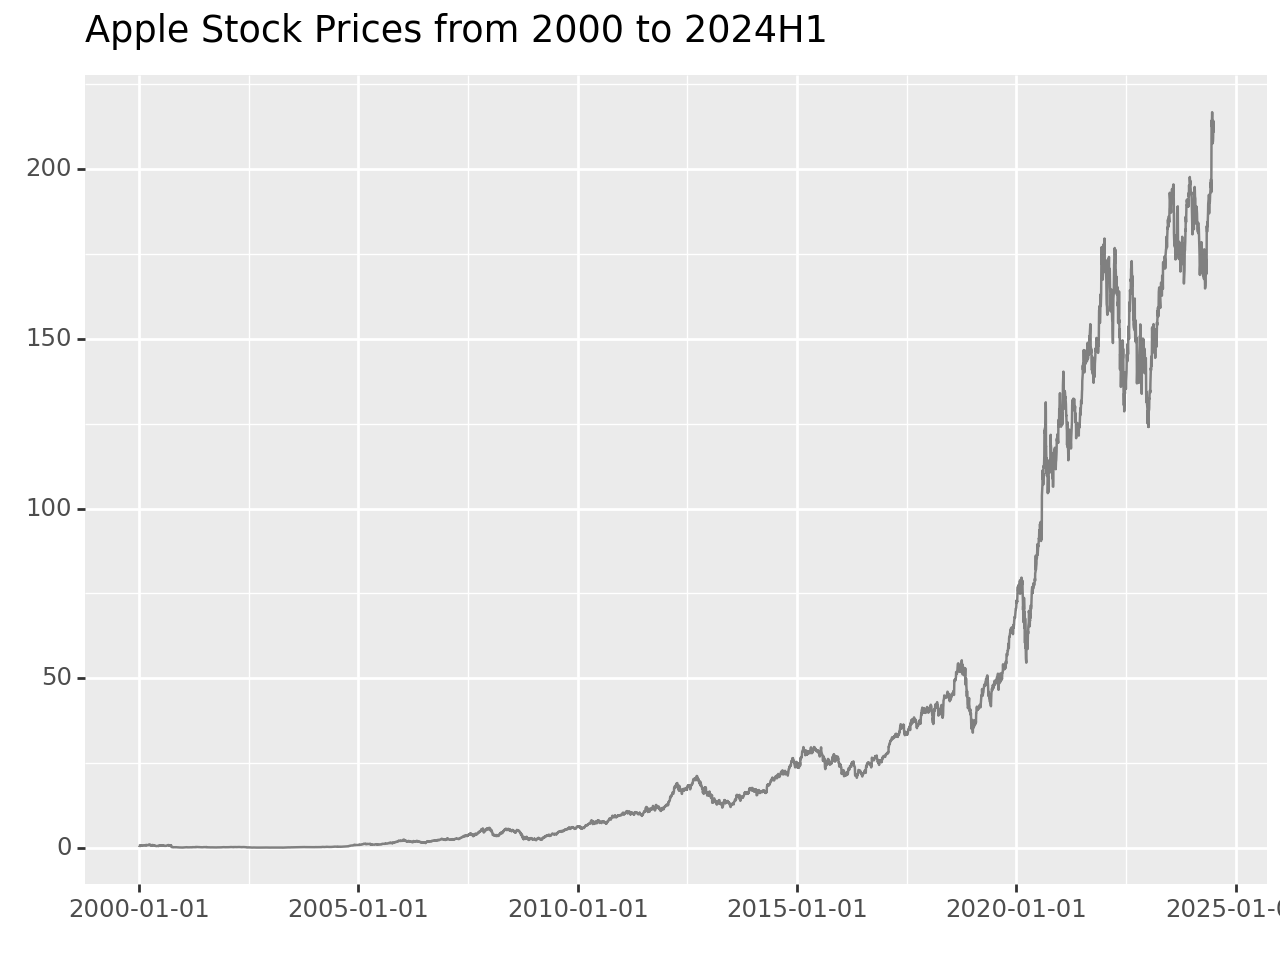

In [2]:
from plotnine import ggplot, geom_line, aes, labs

prices_figure = (
    ggplot(prices,
           aes(y="adjusted", x="date")) +
    geom_line(color="gray") +
    labs(x="", y="",
         title="Apple Stock Prices from 2000 to 2024H1")
)

prices_figure.draw()

The following steps to calculate returens from price series is usefule:

In [49]:
returns = (
    prices
    .sort_values("date")
    .assign(ret=lambda x: x["adjusted"].pct_change())
    .get(["symbol", "date", "ret"])
)

returns.round(3)

,symbol,date,ret
0,AAPL,2000-01-03,NaN
1,AAPL,2000-01-04,-0.084
2,AAPL,2000-01-05,0.015
3,AAPL,2000-01-06,-0.087
4,AAPL,2000-01-07,0.047
...,...,...,...
6156,AAPL,2024-06-24,0.003
6157,AAPL,2024-06-25,0.004
6158,AAPL,2024-06-26,0.020
6159,AAPL,2024-06-27,0.004


To delete the sample with value NA, use the method `.dropna()`:

In [50]:
returns = returns.dropna()

returns.round(3)

,symbol,date,ret
1,AAPL,2000-01-04,-0.084
2,AAPL,2000-01-05,0.015
3,AAPL,2000-01-06,-0.087
4,AAPL,2000-01-07,0.047
5,AAPL,2000-01-10,-0.018
...,...,...,...
6156,AAPL,2024-06-24,0.003
6157,AAPL,2024-06-25,0.004
6158,AAPL,2024-06-26,0.020
6159,AAPL,2024-06-27,0.004


Unlike the `stargazer`library of R, the `stargazer` package in Python does not support generate summary statistics tables (See https://github.com/StatsReporting/stargazer/issues/104). We can only generate summary statistics with the `.describe()` method of dataframe:

In [5]:
returns["ret"].describe()

count    6160.000000
mean        0.001211
std         0.024583
min        -0.518692
25%        -0.009992
50%         0.000889
75%         0.012714
max         0.139049
Name: ret, dtype: float64

We can turn it to a dataframe and transpose it for better readability:

In [6]:
pd.DataFrame(returns["ret"].describe()).round(3).T

,count,mean,std,min,25%,50%,75%,max
ret,6160.0,0.001,0.025,-0.519,-0.01,0.001,0.013,0.139


It also supports exporting to $\LaTeX$ format with the `.to_latex()` method. 

To compute these statistics for each year individually, use `.groupby()` together with `.dt.year`:

In [51]:
(
    returns["ret"]
    .groupby(returns["date"].dt.year)
    .describe()
    .round(3)
)

,count,mean,std,min,25%,50%,75%,max
date,,,,,,,,
2000,251.0,-0.003,0.055,-0.519,-0.034,-0.002,0.027,0.137
2001,248.0,0.002,0.039,-0.172,-0.023,-0.001,0.027,0.129
2002,252.0,-0.001,0.031,-0.150,-0.019,-0.003,0.018,0.085
2003,252.0,0.002,0.023,-0.081,-0.012,0.002,0.015,0.113
2004,252.0,0.005,0.025,-0.056,-0.009,0.003,0.016,0.132
2005,252.0,0.003,0.024,-0.092,-0.010,0.003,0.017,0.091
2006,251.0,0.001,0.024,-0.063,-0.014,-0.002,0.014,0.118
2007,251.0,0.004,0.024,-0.070,-0.009,0.003,0.018,0.105
2008,253.0,-0.003,0.037,-0.179,-0.024,-0.001,0.019,0.139


We can plot the time series and distribution of the returns:

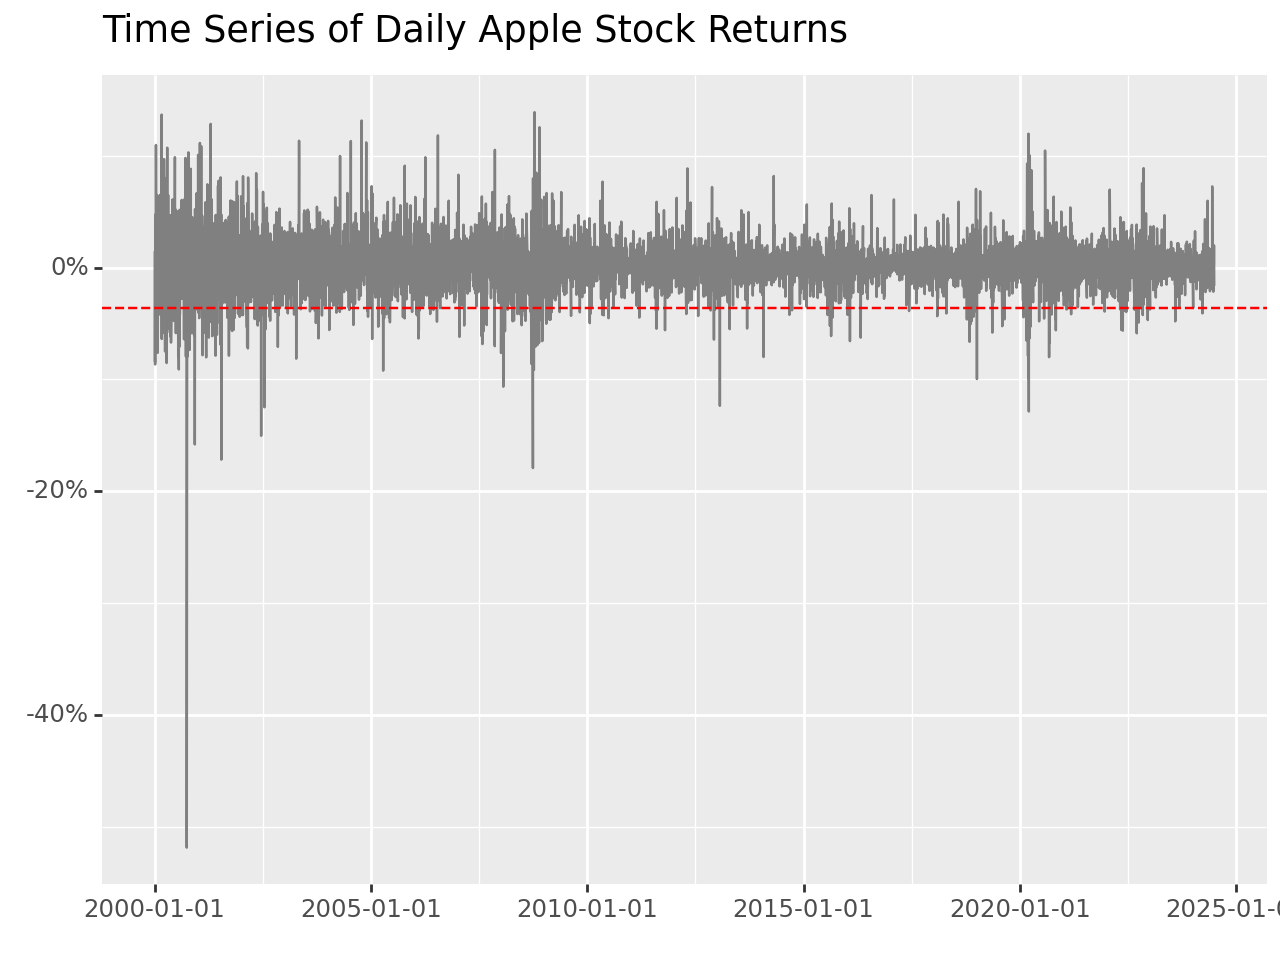

In [8]:
from plotnine import ggplot, geom_line, geom_histogram, geom_hline, geom_vline, aes, labs, scale_x_continuous, scale_y_continuous
from mizani.formatters import percent_format

quantile_05 = returns["ret"].quantile(0.05)

returns_ts_figure = (
    ggplot(returns,
           aes(y="ret", x="date")) +
    geom_line(color="gray") +
    geom_hline(aes(yintercept=quantile_05),
               linetype="dashed",
               color="red") +
    labs(x="", y="",
         title="Time Series of Daily Apple Stock Returns") +
    scale_y_continuous(labels=percent_format())
)

returns_ts_figure.draw()

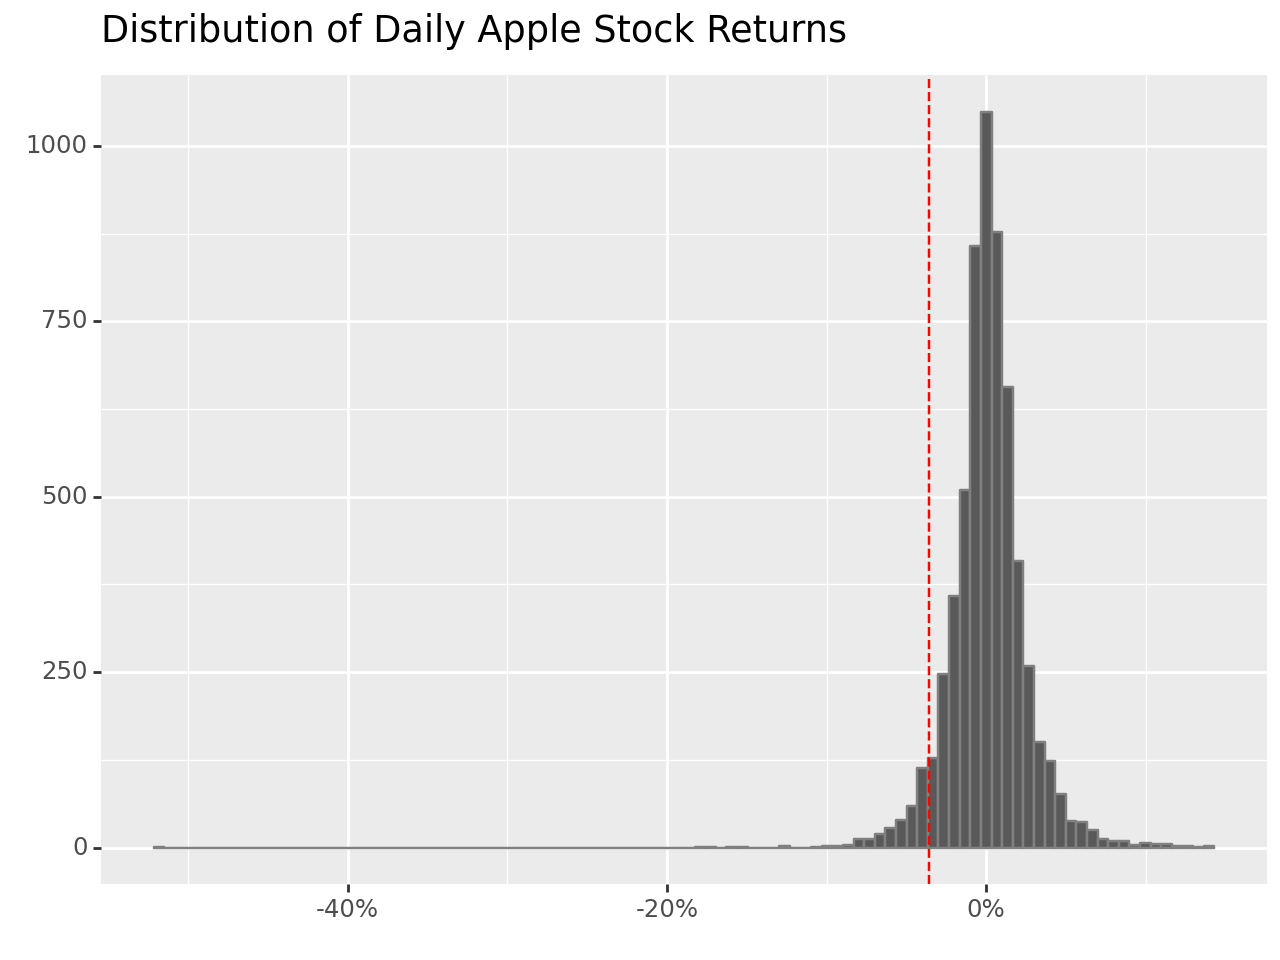

In [9]:
returns_dist_figure = (
    ggplot(returns, aes(x="ret")) +
    geom_histogram(bins=100,
                   color="gray") +
    geom_vline(aes(xintercept=quantile_05),
               linetype="dashed",
               color="red") +
    labs(x="", y="",
         title="Distribution of Daily Apple Stock Returns") +
    scale_x_continuous(labels=percent_format())
)

returns_dist_figure.draw()

## 2.2 Scaling Up the Analysis


Download a table with DOW Jones constituents (30 stock symbols):

In [3]:
url = (
    "https://www.ssga.com/us/en/institutional/etfs/library-content/"
    "products/fund-data/etfs/us/holdings-daily-us-en-dia.xlsx"
)

symbols = (
    pd.read_excel(
        url, 
        skiprows=4, 
        nrows=30
    )
    .get("Ticker")
    .tolist()
)

symbols

['UNH',
 'GS',
 'MSFT',
 'HD',
 'CAT',
 'AMGN',
 'MCD',
 'V',
 'CRM',
 'AXP',
 'AAPL',
 'TRV',
 'JPM',
 'HON',
 'IBM',
 'PG',
 'BA',
 'AMZN',
 'JNJ',
 'CVX',
 'MMM',
 'MRK',
 'DIS',
 'NKE',
 'KO',
 'WMT',
 'DOW',
 'CSCO',
 'VZ',
 'INTC']

The following code are different from that in the book (and does not work inmy experience). Downlaod prices for all these stocks and keep the adjusted close prices, and turn it from wide to long:

In [4]:
raw = (
    yf.download(
        tickers=symbols,
        start="2000-01-01",
        end="2024-06-30",
        progress=False
    )
)

adj_prices = (
    raw
     ["Adj Close"]
    .reset_index(drop=False)
)

index_prices = (
    pd.melt(
        adj_prices,
        id_vars=["Date"],
        value_vars=symbols,
        value_name="adjusted"
    )
    .rename(columns={
        "Date": "date",
        "Ticker": "symbol"
    })
)

index_prices.sort_values(["symbol", "date"])

,date,symbol,adjusted
61610,2000-01-03,AAPL,0.844981
61611,2000-01-04,AAPL,0.773741
61612,2000-01-05,AAPL,0.785063
61613,2000-01-06,AAPL,0.717125
61614,2000-01-07,AAPL,0.751094
...,...,...,...
160181,2024-06-24,WMT,68.900002
160182,2024-06-25,WMT,67.419998
160183,2024-06-26,WMT,68.290001
160184,2024-06-27,WMT,67.879997


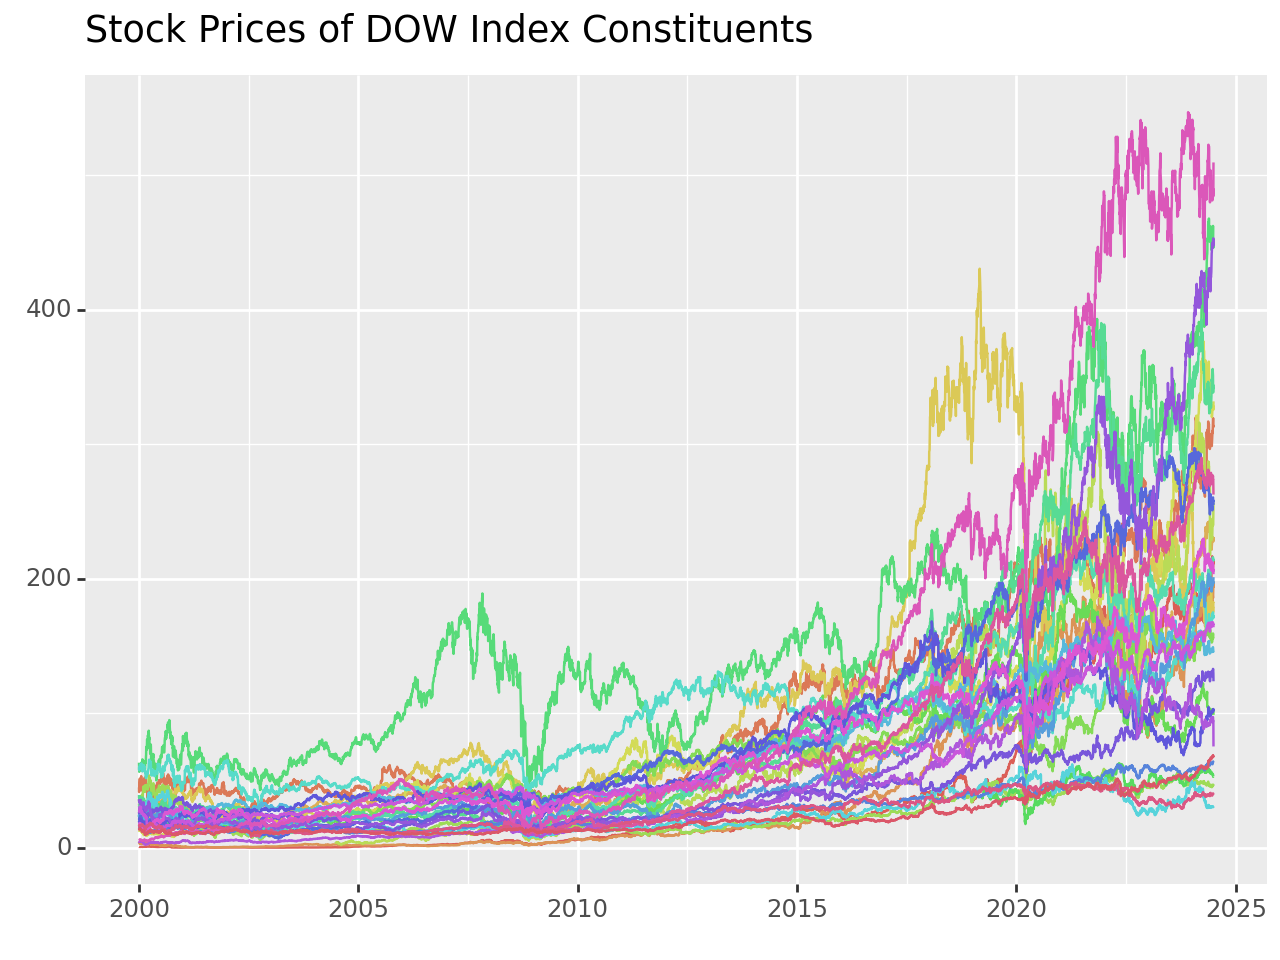

In [5]:
from plotnine import ggplot, geom_line, aes, labs, scale_x_datetime, theme
from mizani.breaks import date_breaks
from mizani.formatters import date_format

index_prices_figure = (
    ggplot(index_prices,
    aes(y="adjusted", x="date", color="symbol")) +
    geom_line() +
    labs(x="", y="", color="",
         title="Stock Prices of DOW Index Constituents") +
    theme(legend_position="none") +
    scale_x_datetime(date_breaks="5 years", date_labels="%Y")
)

index_prices_figure.draw()

To compute the returns, use `.groupby()` such that the `assign()` command is performed to calculate the returns for each symbol individually (we specify `fill_method=None` to avoid warning message):

In [15]:
all_returns = (
    index_prices
    .assign(ret=lambda x: x.groupby("symbol")["adjusted"].pct_change(fill_method=None))
    .get(["symbol", "date", "ret"])
    .dropna(subset="ret")
)

all_returns

,symbol,date,ret
1,UNH,2000-01-04,-0.012791
2,UNH,2000-01-05,-0.002356
3,UNH,2000-01-06,0.036600
4,UNH,2000-01-07,0.117312
5,UNH,2000-01-10,-0.017329
...,...,...,...
184825,INTC,2024-06-24,-0.016726
184826,INTC,2024-06-25,0.005561
184827,INTC,2024-06-26,-0.006506
184828,INTC,2024-06-27,0.001637


These returns can also be summarised with the method `.describe()`:

In [16]:
(
    all_returns
    .groupby("symbol")["ret"]
    .describe()
    .round(3)
)

,count,mean,std,min,25%,50%,75%,max
symbol,,,,,,,,
AAPL,6160.0,0.001,0.025,-0.519,-0.010,0.001,0.013,0.139
AMGN,6160.0,0.001,0.019,-0.134,-0.009,0.000,0.009,0.151
AMZN,6160.0,0.001,0.031,-0.248,-0.012,0.000,0.014,0.345
AXP,6160.0,0.001,0.023,-0.176,-0.009,0.000,0.010,0.219
BA,6160.0,0.001,0.022,-0.238,-0.010,0.001,0.011,0.243
CAT,6160.0,0.001,0.020,-0.145,-0.010,0.001,0.011,0.147
CRM,5038.0,0.001,0.027,-0.271,-0.012,0.001,0.014,0.260
CSCO,6160.0,0.000,0.023,-0.162,-0.009,0.000,0.010,0.244
CVX,6160.0,0.001,0.017,-0.221,-0.008,0.001,0.009,0.227


## 2.3 Other Forms of Data Aggregation

Extract the volume data and merge it to the adjusted closed price data:

In [6]:
volumes = (
    raw
     ["Volume"]
    .reset_index(drop=False)
)

index_volumes = (
    pd.melt(
        volumes,
        id_vars=["Date"],
        value_vars=symbols,
        value_name="volume"
    )
    .rename(columns={
        "Date": "date",
        "Ticker": "symbol"
    })
)

prices_volumes = (
    pd.merge(index_prices, index_volumes, on=["date", "symbol"])
)

prices_volumes.sort_values(["symbol", "date"])

,date,symbol,adjusted,volume
61610,2000-01-03,AAPL,0.844981,535796800.0
61611,2000-01-04,AAPL,0.773741,512377600.0
61612,2000-01-05,AAPL,0.785063,778321600.0
61613,2000-01-06,AAPL,0.717125,767972800.0
61614,2000-01-07,AAPL,0.751094,460734400.0
...,...,...,...,...
160181,2024-06-24,WMT,68.900002,12470400.0
160182,2024-06-25,WMT,67.419998,20904000.0
160183,2024-06-26,WMT,68.290001,14177500.0
160184,2024-06-27,WMT,67.879997,12899200.0


Now we can calculate approximately the aggregate trading volume (and its lag) in billion USD:

In [12]:
trading_volume = (
    prices_volumes
    .assign(trading_volume=lambda x: (x["adjusted"]*x["volume"])/1e9)
    .groupby("date")
    ["trading_volume"]
    .sum()
    .reset_index()
    .assign(trading_volume_lag=lambda x: x["trading_volume"].shift(periods=1))
)

trading_volume

,date,trading_volume,trading_volume_lag
0,2000-01-03,11.603151,NaN
1,2000-01-04,10.718270,11.603151
2,2000-01-05,13.750332,10.718270
3,2000-01-06,10.194396,13.750332
4,2000-01-07,11.008288,10.194396
...,...,...,...
6156,2024-06-24,66.860549,138.867476
6157,2024-06-25,58.753221,66.860549
6158,2024-06-26,59.687455,58.753221
6159,2024-06-27,60.283639,59.687455


Let's plot the time series of the aggregate trading volume:

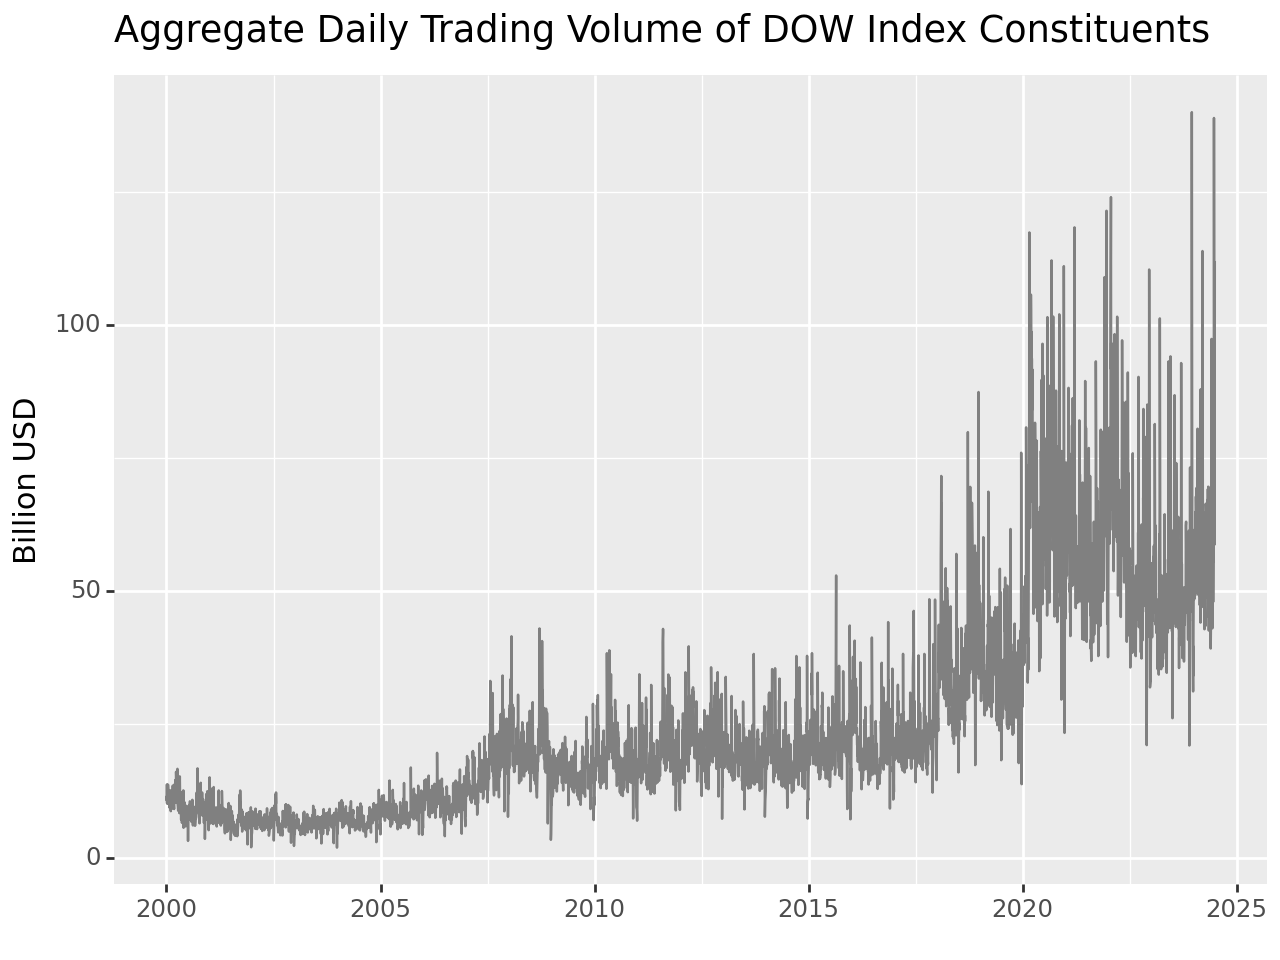

In [9]:
from plotnine import ggplot, geom_line, aes, labs, scale_x_datetime

trading_volume_figure = (
    ggplot(
        trading_volume,
        aes(x="date", y="trading_volume")) +
    geom_line(color="gray") +
    labs(x="", y="Billion USD", 
         title="Aggregate Daily Trading Volume of DOW Index Constituents") +
    scale_x_datetime(date_breaks="5 years", date_labels="%Y")
)

trading_volume_figure.draw()

To illustrate the persistence of trading volume, plot volume on day $t$ against volume on day $t-1$:

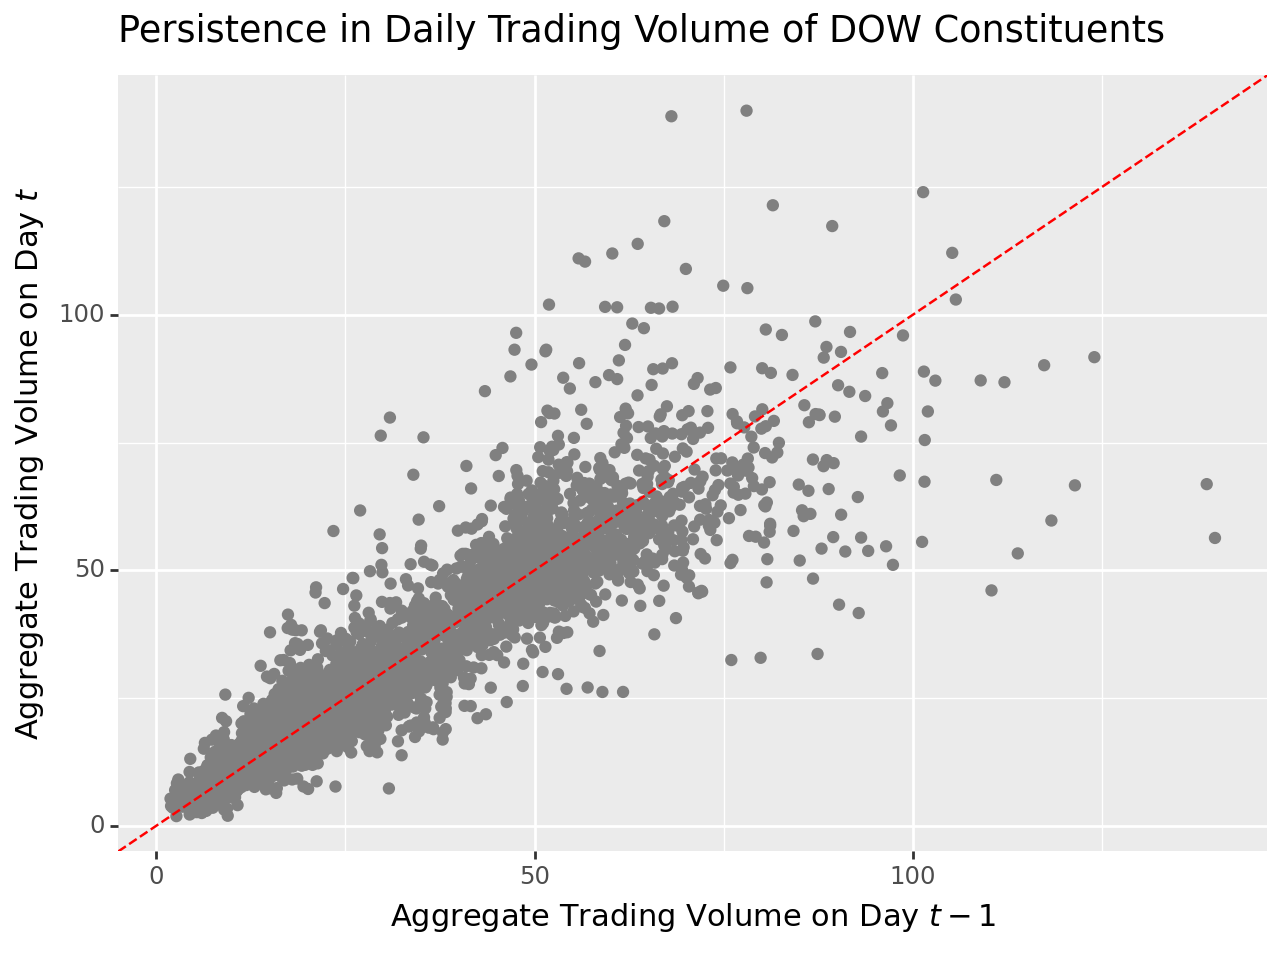

In [15]:
from plotnine import ggplot, geom_point, geom_abline, aes, labs

trading_volume_persistence_figure = (
    ggplot(
        trading_volume.dropna(subset="trading_volume_lag"),
        aes(x="trading_volume_lag", y="trading_volume")) +
    geom_point(color="gray") +
    geom_abline(aes(intercept=0, slope=1), linetype="dashed", color="red") +
    labs(x="Aggregate Trading Volume on Day $t-1$",
         y="Aggregate Trading Volume on Day $t$",
         title="Persistence in Daily Trading Volume of DOW Constituents")
)

trading_volume_persistence_figure.draw()

## 2.4 Portfolio Choice Problems